In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

EDA

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

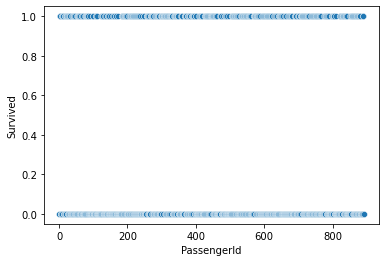

In [10]:
sns.scatterplot(x='PassengerId', y='Survived',data=df)

By observing above plot passangerID is not much related to survival rate.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

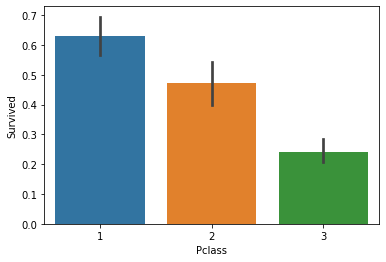

In [29]:
sns.barplot(x='Pclass', y='Survived',data=df)

In [20]:
pd.get_dummies(df["Pclass"]).sum()

1    216
2    184
3    491
dtype: int64

By observing above plot, survival rate in class 1 is higher than other two classes.

<AxesSubplot:xlabel='Name', ylabel='Survived'>

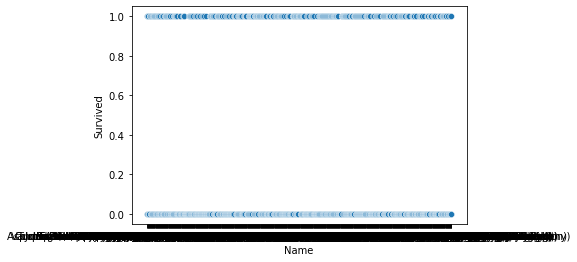

In [12]:
sns.scatterplot(x='Name', y='Survived',data=df)

Name does not affect survival.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

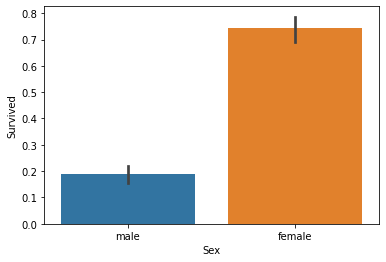

In [32]:
sns.barplot(x='Sex', y='Survived',data=df)

In [31]:
pd.get_dummies(df['Sex']).sum()

female    314
male      577
dtype: int64

By observinf above pattern, more females are survived as compared to male.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

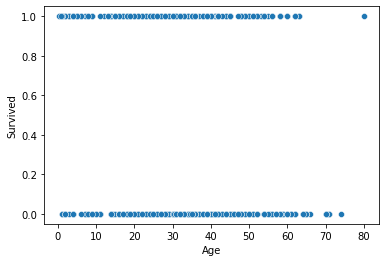

In [48]:
sns.scatterplot(x='Age', y='Survived',data=df)

By observing above pattern, few people aged more than 65 couldnt survived..

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

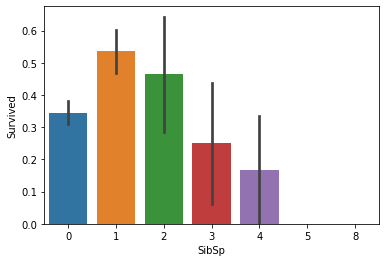

In [34]:
sns.barplot(x='SibSp', y='Survived',data=df)

In [33]:
pd.get_dummies(df['SibSp']).sum()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

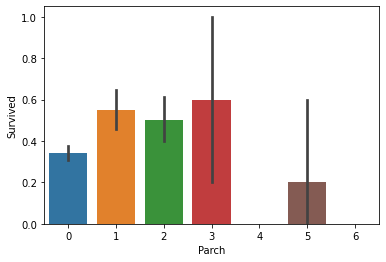

In [35]:
sns.barplot(x='Parch', y='Survived',data=df)

In [36]:
pd.get_dummies(df['Parch']).sum()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

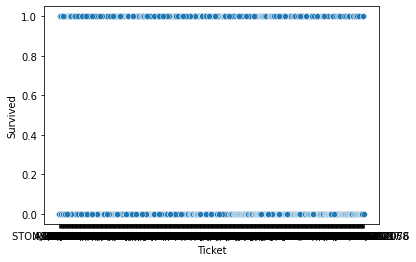

In [16]:
sns.scatterplot(x='Ticket', y='Survived',data=df)

by observing above pattern, ticket does not impact on survival rate

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

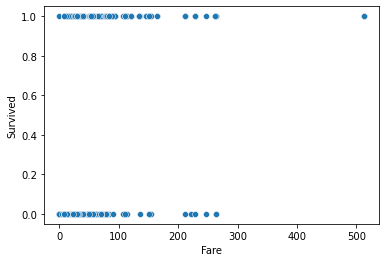

In [42]:
sns.scatterplot(x='Fare', y='Survived',data=df)

by observing above plot, we see almost equal ditribution hence fare has not much impact on survival.

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

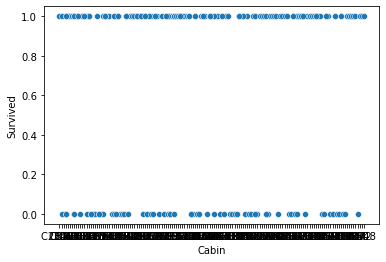

In [44]:
sns.scatterplot(x='Cabin', y='Survived',data=df)

Cabin does not impact survival.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

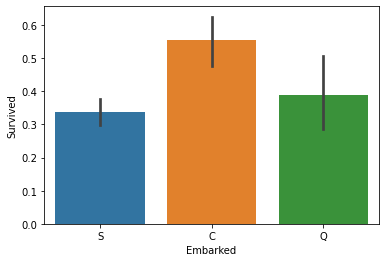

In [50]:
sns.barplot(x='Embarked', y='Survived',data=df)

In [51]:
pd.get_dummies(df['Embarked']).sum()

C    168
Q     77
S    644
dtype: int64

more people from port C has survived follwed by Q and lastly S.

Data Preprocessing

Checking and handling null values

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age is continouse numerical data, so will eliminate null values by replacing mean value.

In [59]:
Mean_Age = df['Age'].mean()
#Mean age is 29.699117647058763
df['Age'] = df['Age'].fillna(Mean_Age)

Embarked is categorical data so we will replace null with mode value

In [61]:
Mode_Embarked = df["Embarked"].mode()[0]
# value for Mode_Embarked is 'S'
df['Embarked'] = df['Embarked'].fillna(Mode_Embarked)

In [ ]:
Cabin has 687 null values out of 891.

In [70]:
percentage_null_values = (687/891)*100
percentage_null_values

77.10437710437711

77% of Cabin data is missing hence we are dropping cabin column.

In [77]:
df_new=df.drop('Cabin',axis=1)

Encoding Categorical data

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new["Sex"] = le.fit_transform(df_new['Sex'])

In [93]:
df_new['Sex']
pd.get_dummies(df_new['Sex']).head()

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [94]:
df_new["Embarked"] = le.fit_transform(df_new['Embarked'])
df_new['Embarked']
pd.get_dummies(df_new['Embarked']).head()

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [95]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [97]:
df_new['Embarked'].value_counts()
#C    168 = 0
#Q     77 = 1
#S    644 = 2

2    646
0    168
1     77
Name: Embarked, dtype: int64

Feature Selection

Name, Ticket, Passanger ID has no impact on survival hence dropping these columns.
Cabin column has already dropped as 77% data is missing.

In [105]:
Data = df_new.drop(columns=['Name','Ticket','PassengerId'])
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


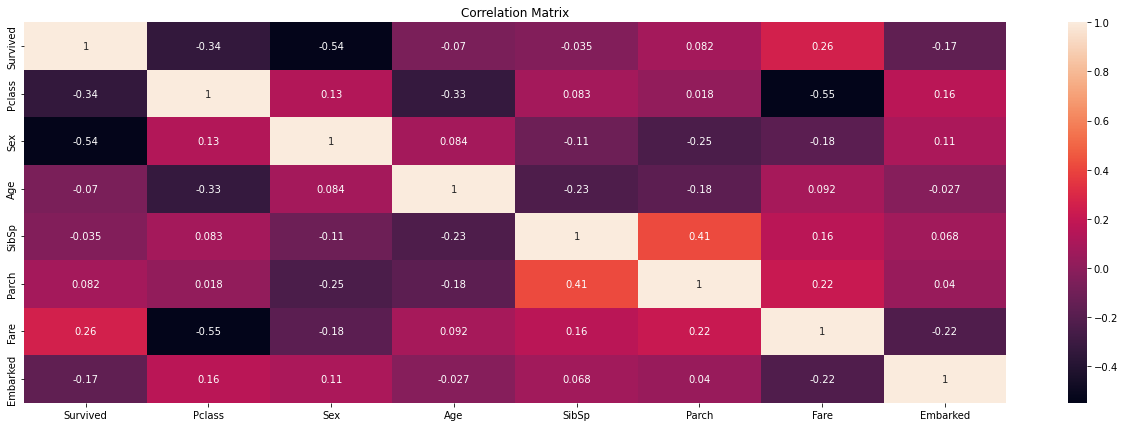

In [106]:
corr_mat = Data.corr()

plt.figure(figsize=[22,7])

sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

In [108]:
corr_matrix = Data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

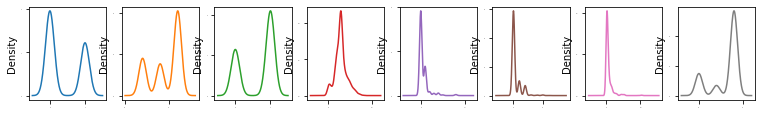

In [109]:
Data.plot(kind='density',subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

In [110]:
x = Data.drop("Survived",axis=1)
y = Data["Survived"]

In [111]:
x.skew().sort_values(ascending=False)

Fare        4.787317
SibSp       3.695352
Parch       2.749117
Age         0.434488
Sex        -0.618921
Pclass     -0.630548
Embarked   -1.264823
dtype: float64

In [112]:
from sklearn.preprocessing import power_transform, PowerTransformer

In [113]:
x_new = power_transform(x)

In [114]:
x_new

array([[ 0.86397329,  0.73769513, -0.55626693, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [-1.45912855, -1.35557354,  0.65726854, ..., -0.56025296,
         1.33665056, -1.78052001],
       [ 0.86397329, -1.35557354, -0.24157742, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [ 0.86397329, -1.35557354,  0.04200106, ...,  1.84685634,
         0.28888536,  0.61041095],
       [-1.45912855,  0.73769513, -0.24157742, ..., -0.56025296,
         0.52790578, -1.78052001],
       [ 0.86397329,  0.73769513,  0.21525442, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [117]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending=False)

Parch       1.228795
SibSp       0.808608
Age         0.064420
Fare       -0.040329
Pclass     -0.441438
Sex        -0.618921
Embarked   -1.064527
dtype: float64

In [131]:
data_train=pd.DataFrame(x_new, columns=x.columns)

Checking Outliers

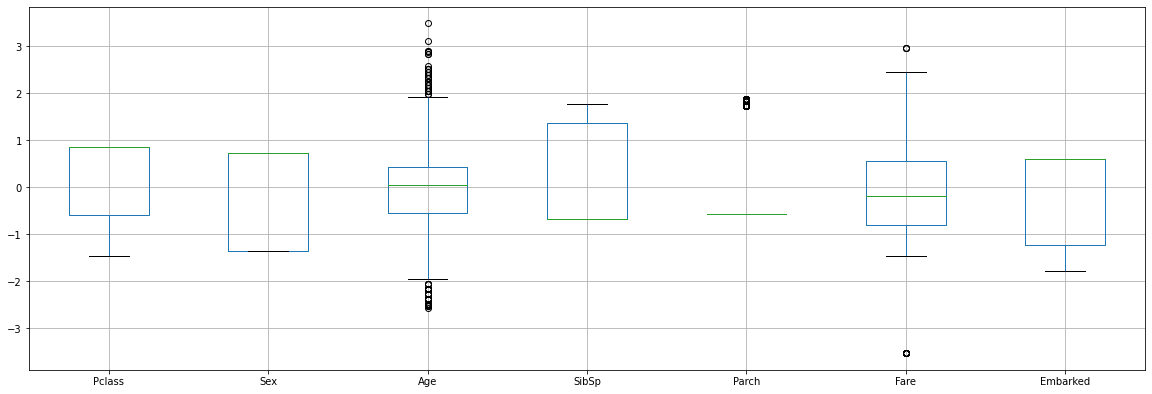

In [132]:
data_train.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Age,Parch and Fare has outliers. Lets remove outliers.

In [140]:
from scipy.stats import zscore
(np.abs(zscore(data_train))<3).all().all()

False

In [141]:
(np.abs(zscore(data_train))<3).all().all()

False

In [176]:
from scipy.stats import zscore
z=np.abs(zscore(data_train))
threshold=3
np.where(z>3)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
        806, 815, 822, 851], dtype=int64),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int64))

In [177]:
df_new_z = Data[(z<3).all(axis=1)]
df_new_z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [178]:
df_new_z.shape

(874, 8)

In [179]:
Data_loss=((891-874)/874)*100
Data_loss

1.9450800915331807

VIF (Checking Multi colinearity)

In [180]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [181]:
X_scaled

array([[ 0.86397329,  0.73769513, -0.55626693, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [-1.45912855, -1.35557354,  0.65726854, ..., -0.56025296,
         1.33665056, -1.78052001],
       [ 0.86397329, -1.35557354, -0.24157742, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [ 0.86397329, -1.35557354,  0.04200106, ...,  1.84685634,
         0.28888536,  0.61041095],
       [-1.45912855,  0.73769513, -0.24157742, ..., -0.56025296,
         0.52790578, -1.78052001],
       [ 0.86397329,  0.73769513,  0.21525442, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [182]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = data_train.columns

vif

,vif,Features
0,1.921497,Pclass
1,1.124948,Sex
2,1.245512,Age
3,1.413873,SibSp
4,1.487984,Parch
5,2.345948,Fare
6,1.047580,Embarked


All the VIF values are less than 5 and very low. This means no multicollinearity present

Separating Train and Test Data

In [246]:
preprocessing.normalize(data_train)

array([[ 0.3884934 ,  0.33171129, -0.25013046, ..., -0.25192281,
        -0.39516937,  0.27447681],
       [-0.42922444, -0.39876219,  0.19334535, ..., -0.16480677,
         0.39319572, -0.52376654],
       [ 0.41117013, -0.64512568, -0.11496816, ..., -0.26662779,
        -0.37599666,  0.29049828],
       ...,
       [ 0.29917656, -0.46940784,  0.01454412, ...,  0.63952919,
         0.10003519,  0.21137303],
       [-0.55321539,  0.27969043, -0.09159189, ..., -0.21241484,
         0.2001507 , -0.67506805],
       [ 0.41657207,  0.35568599,  0.10378675, ..., -0.27013073,
        -0.39168121, -0.59611145]])

In [247]:
data_train = pd.DataFrame(data_train)

In [248]:
data_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.863973,0.737695,-0.556267,1.373636,-0.560253,-0.878820,0.610411
1,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.336651,-1.780520
2,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,-0.790065,0.610411
3,-1.459129,-1.355574,0.437923,1.373636,-0.560253,1.067352,0.610411
4,0.863973,0.737695,0.437923,-0.679850,-0.560253,-0.774439,0.610411
...,...,...,...,...,...,...,...
886,-0.592604,0.737695,-0.164262,-0.679850,-0.560253,-0.294907,0.610411
887,-1.459129,-1.355574,-0.798775,-0.679850,-0.560253,0.527906,0.610411
888,0.863973,-1.355574,0.042001,1.373636,1.846856,0.288885,0.610411
889,-1.459129,0.737695,-0.241577,-0.679850,-0.560253,0.527906,-1.780520


In [257]:
x = Data.drop("Survived",axis=1)
y = Data["Survived"]

In [258]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
kfold = StratifiedKFold(n_splits=10)
from sklearn.metrics import accuracy_score

In [260]:
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=10).fit(X_train,y_train)
result = cross_val_score(i,X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
cv_mean = result.mean()

print("Accuracy for logistic regression:", cv_mean)


Accuracy for logistic regression: 0.7963557993730407
